In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('D:\\MyEnvironment\\Jupyter-Notebook\\Notebooks\\Dataset\\Sample - Superstore.csv', encoding='latin1')
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


---
## **Data Overview**

In [52]:
# df.info()
# df.shape
# df.dtypes
# df.select_dtypes(include='number')
# df.select_dtypes(include='object')
# df.select_dtypes(include='float')
# df['Order Date']=df['Order Date'].str.replace('/','-')
# df['Order Date']=pd.to_datetime(df['Order Date'])
# df['Order Date']
# df['Ship Date']=df['Ship Date'].str.replace('/','-')
# df['Ship Date']=pd.to_datetime(df['Ship Date'])
# df['Ship Date']
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Order_Year     9994 non-null   int64         
 4   Order_Month    9994 non-null   int64         
 5   Ship Date      9994 non-null   datetime64[ns]
 6   Ship Mode      9994 non-null   object        
 7   Shipping_Days  9994 non-null   int64         
 8   Customer ID    9994 non-null   object        
 9   Customer Name  9994 non-null   object        
 10  Segment        9994 non-null   object        
 11  Country        9994 non-null   object        
 12  City           9994 non-null   object        
 13  State          9994 non-null   object        
 14  Postal Code    9994 non-null   int64         
 15  Region         9994 n

#### **Task Completed:**
* Overview of Dataset
* Identified Shape of Dataset
* Identified Datatypes of Columns
* Inspected Columns with specific dtype (object, number, float)
* Changed Order Date and Ship Date dtype to datetime64

---
## **Data Cleaining**

In [4]:
df.isna().any()
df.duplicated().any()
df[df.duplicated()]
df[df['Profit']<0]
df[df['Sales']==0.0]
order_year=pd.Series(df['Order Date'].astype('str').str.split('-').str[0])
df.insert(3,'Order_Year',order_year)
df['Order_Year']=df['Order_Year'].astype(int)
order_month=pd.Series(df['Order Date'].astype('str').str.split('-').str[1])
df.insert(4,'Order_Month',order_month)
df['Order_Month']=df['Order_Month'].astype(int)
df.insert(7,'Shipping_Days',df['Ship Date'] - df['Order Date'])
df['Shipping_Days']=df['Shipping_Days'].dt.days
df


# (.dt.year, .dt.month) # Can also be used 

,Row ID,Order ID,Order Date,Order_Year,Order_Month,Ship Date,Ship Mode,Shipping_Days,Customer ID,Customer Name,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016,11,2016-11-11,Second Class,3,CG-12520,Claire Gute,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016,11,2016-11-11,Second Class,3,CG-12520,Claire Gute,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016,6,2016-06-16,Second Class,4,DV-13045,Darrin Van Huff,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015,10,2015-10-18,Standard Class,7,SO-20335,Sean O'Donnell,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015,10,2015-10-18,Standard Class,7,SO-20335,Sean O'Donnell,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,2014,1,2014-01-23,Second Class,2,TB-21400,Tom Boeckenhauer,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2017-02-26,2017,2,2017-03-03,Standard Class,5,DB-13060,Dave Brooks,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2017-02-26,2017,2,2017-03-03,Standard Class,5,DB-13060,Dave Brooks,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2017-02-26,2017,2,2017-03-03,Standard Class,5,DB-13060,Dave Brooks,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


#### **Task Completed:**
* Indentifyed Missing Values (Got None)
* Detected Duplicate Rows (Got None)
* Replaced Negative Profit with 0
* Detected Rows with 0 Sales (Got None)
* Added Order_Year Column
* Added Order_Month Column
* Added Shipping_Days Column

---
## **Sales Perfomance Analysis**

In [5]:
total_sales=df['Sales'].sum()
total_sales
total_profit=df['Profit'].sum()
total_profit
total_qty=df['Quantity'].sum()
total_qty

sales_by_category=df.groupby('Category',as_index=False)['Sales'].sum()
profit_by_category=df.groupby('Category',as_index=False)['Profit'].sum()

sales_by_sub_category=df.groupby('Sub-Category',as_index=False)['Sales'].sum()
profit_by_sub_category=df.groupby('Sub-Category',as_index=False)['Profit'].sum()

sales_by_segment=df.groupby('Segment',as_index=False)['Sales'].sum()
profit_by_segment=df.groupby('Segment',as_index=False)['Profit'].sum()

sales_by_region=df.groupby('Region',as_index=False)['Sales'].sum()
profit_by_region=df.groupby('Region',as_index=False)['Profit'].sum()

top_prod_by_sales=df.groupby('Product Name',as_index=False)['Sales'].sum().sort_values(by='Sales',ascending=False).head(10)
top_prod_by_profit=df.groupby('Product Name',as_index=False)['Profit'].sum().sort_values(by='Profit',ascending=False).head(10)


loss_making_prod=df[df['Profit']<0]

In [6]:
sales_by_sub_category.sort_values(by='Sales',ascending=False).head(10)

,Sub-Category,Sales
13,Phones,330007.0540
5,Chairs,328449.1030
14,Storage,223843.6080
16,Tables,206965.5320
3,Binders,203412.7330
11,Machines,189238.6310
0,Accessories,167380.3180
6,Copiers,149528.0300
4,Bookcases,114879.9963
1,Appliances,107532.1610


### **Sales By Category**

<BarContainer object of 3 artists>

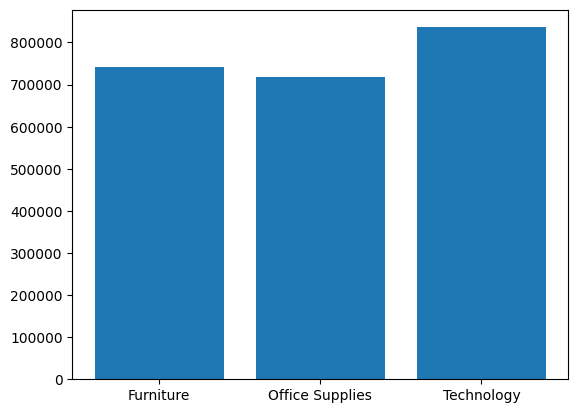

In [7]:
plt.bar(sales_by_category['Category'],sales_by_category['Sales'])

### **Profit By Category**

<BarContainer object of 3 artists>

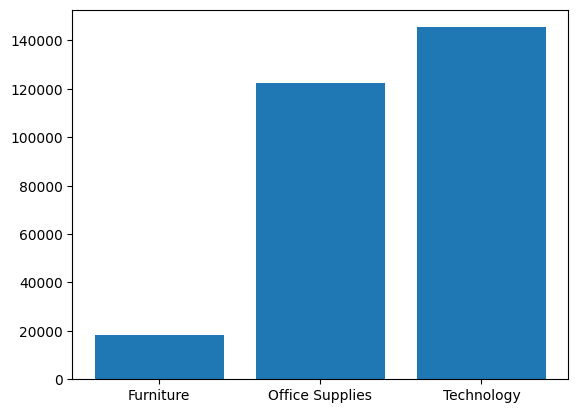

In [8]:
plt.bar(profit_by_category['Category'],profit_by_category['Profit'])


### **Top-10 Sub-Categories By Sales**

<BarContainer object of 10 artists>

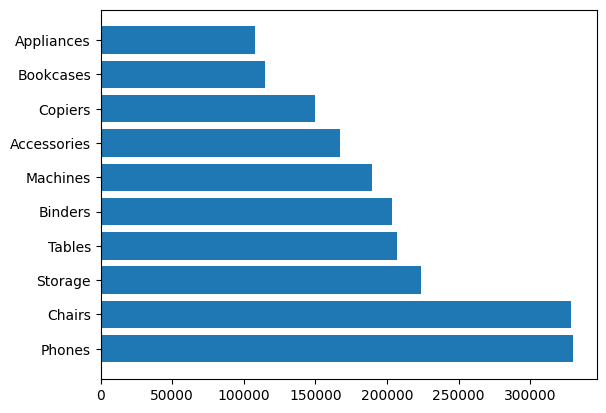

In [9]:
top_sub_category_by_sales = sales_by_sub_category.sort_values(by='Sales',ascending=False,).head(10)
plt.barh(top_sub_category_by_sales['Sub-Category'],top_sub_category_by_sales['Sales'])

### **Bottom-10 Sub-Categories by Profit (Loss Makers)**

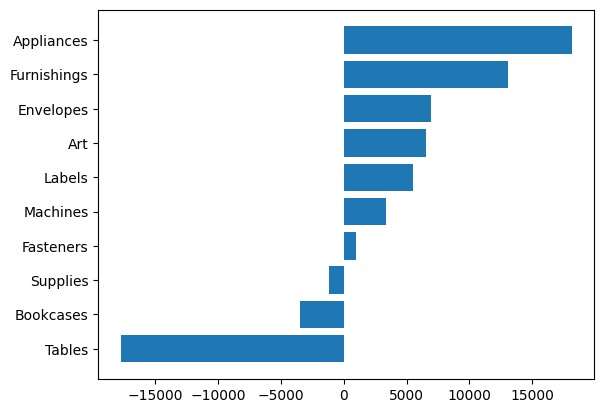

In [10]:
bottom_sub_category_by_profit=profit_by_sub_category.sort_values(by='Profit',ascending=True).head(10)
plt.figure()
plt.barh(bottom_sub_category_by_profit['Sub-Category'],bottom_sub_category_by_profit['Profit'])
plt.show()

### **Sales By Segment**

<BarContainer object of 3 artists>

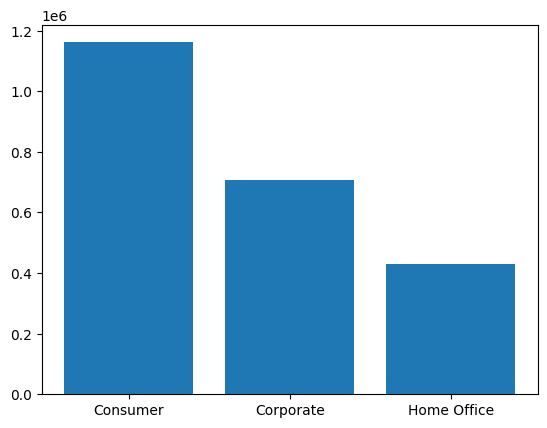

In [11]:
plt.bar(sales_by_segment['Segment'],sales_by_segment['Sales'])

### **Profit By Segment**

<BarContainer object of 3 artists>

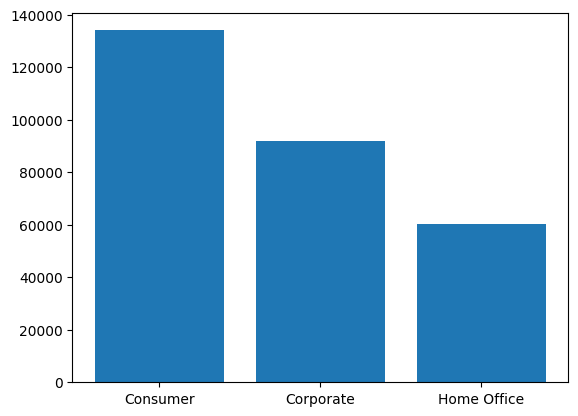

In [12]:
plt.bar(profit_by_segment['Segment'],profit_by_segment['Profit'])

### **Profit By Region**

<BarContainer object of 4 artists>

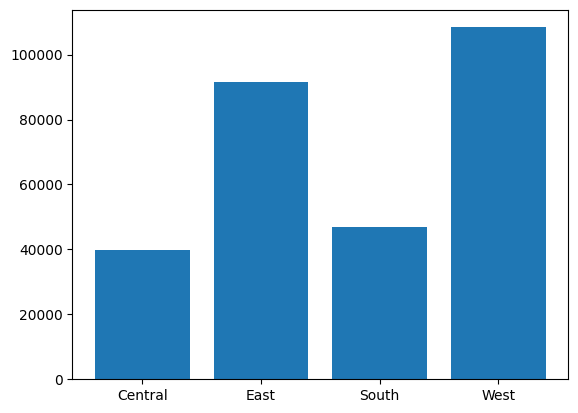

In [13]:
plt.bar(profit_by_region['Region'],profit_by_region['Profit'])

### **Top 10 Products by Sales**

<BarContainer object of 10 artists>

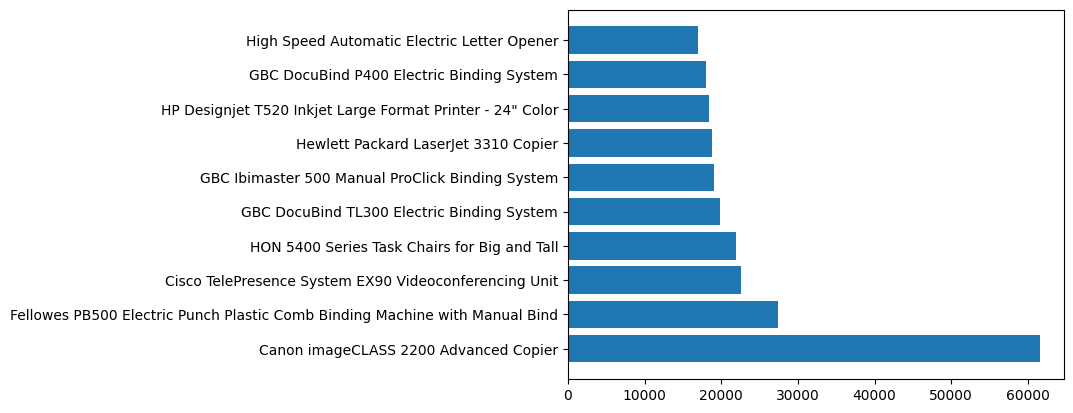

In [14]:
plt.barh(top_prod_by_sales['Product Name'],top_prod_by_sales['Sales'])


### **Top 10 Products by Profit**


<BarContainer object of 10 artists>

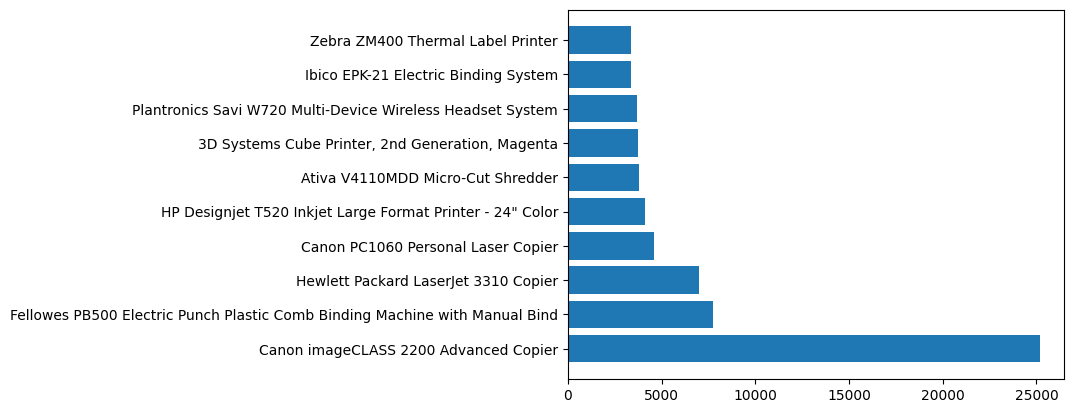

In [15]:
plt.barh(top_prod_by_profit['Product Name'],top_prod_by_profit['Profit'])

#### **Task Completed:**
* Calculated Total Sales, Profit and Quantity
* Determined Sales By Category, Sub-Category, Segment, Region
* Determined By Category, Sub-Category, Segment, Region
* Identified Top 10 Products by Sales
* Identified Top 10 Products by Profit
* Identified Top 10 Sub-Categories by Sales
* Identified Bottom  10 Sub-Categories by Profit (Loss Makers)



---
## **Time Series Analysis**

In [ ]:
sales_by_year=df.groupby('Order_Year',as_index=False)['Sales'].sum()
profit_by_year=df.groupby('Order_Year',as_index=False)['Profit'].sum()
sales_by_month=df.groupby('Order_Month',as_index=False)['Sales'].sum()
profit_by_month=df.groupby('Order_Month',as_index=False)['Profit'].sum()
sales_by_month=sales_by_month.sort_values(by='Order_Month')
profit_by_month = profit_by_month.sort_values(by='Order_Month')


df['Year-Month'] = df['Order Date'].dt.to_period('M').astype(str)

sales_by_year_month=df.groupby('Year-Month',as_index=False)['Sales'].sum()
profit_by_year_month=df.groupby('Year-Month',as_index=False)['Profit'].sum()


In [93]:
line_style=dict(marker="o",
          markersize=10,
          markerfacecolor="navy",
          markeredgecolor="navy",
          linestyle="dashdot",
          linewidth=0.9,
          color="blue")

### **Sales By Year**

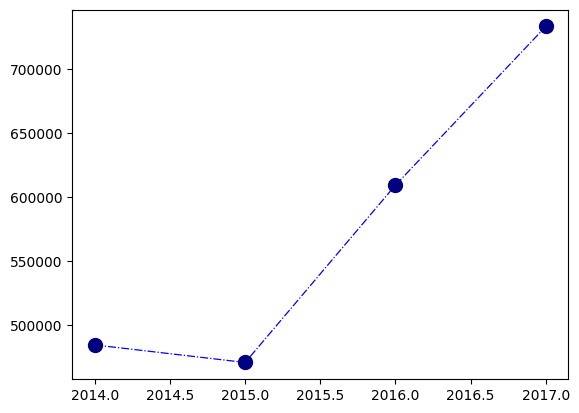

In [94]:
plt.figure()
plt.plot(sales_by_year['Order_Year'],sales_by_year['Sales'],**line_style)
plt.show()

### **Profit By Year**

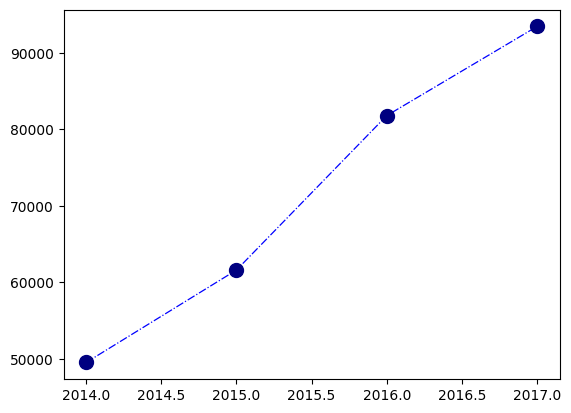

In [95]:
plt.figure()
plt.plot(profit_by_year['Order_Year'],profit_by_year['Profit'],**line_style)
plt.show()

### **Sales By Month**

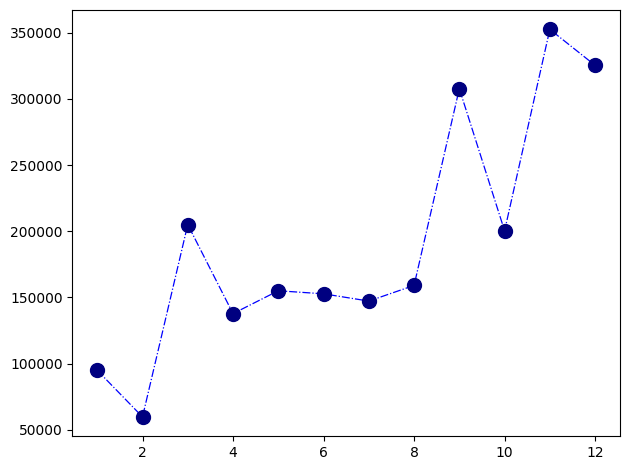

In [101]:
plt.figure()
plt.plot(sales_by_month['Order_Month'],sales_by_month['Sales'],**line_style)
plt.tight_layout()
plt.show()

### **Profit By Month**

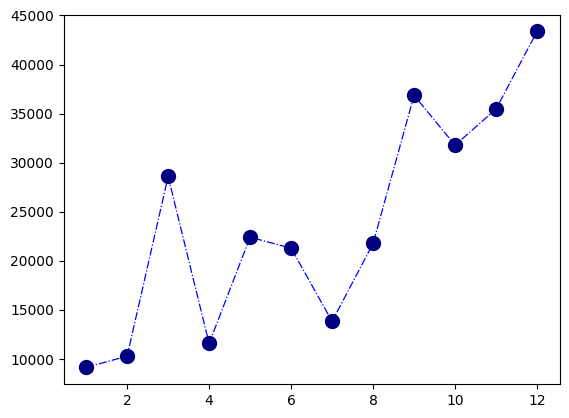

In [102]:
plt.figure()
plt.plot(profit_by_month['Order_Month'],profit_by_month['Profit'],**line_style)
plt.show()

### **Sales By Year-Month**

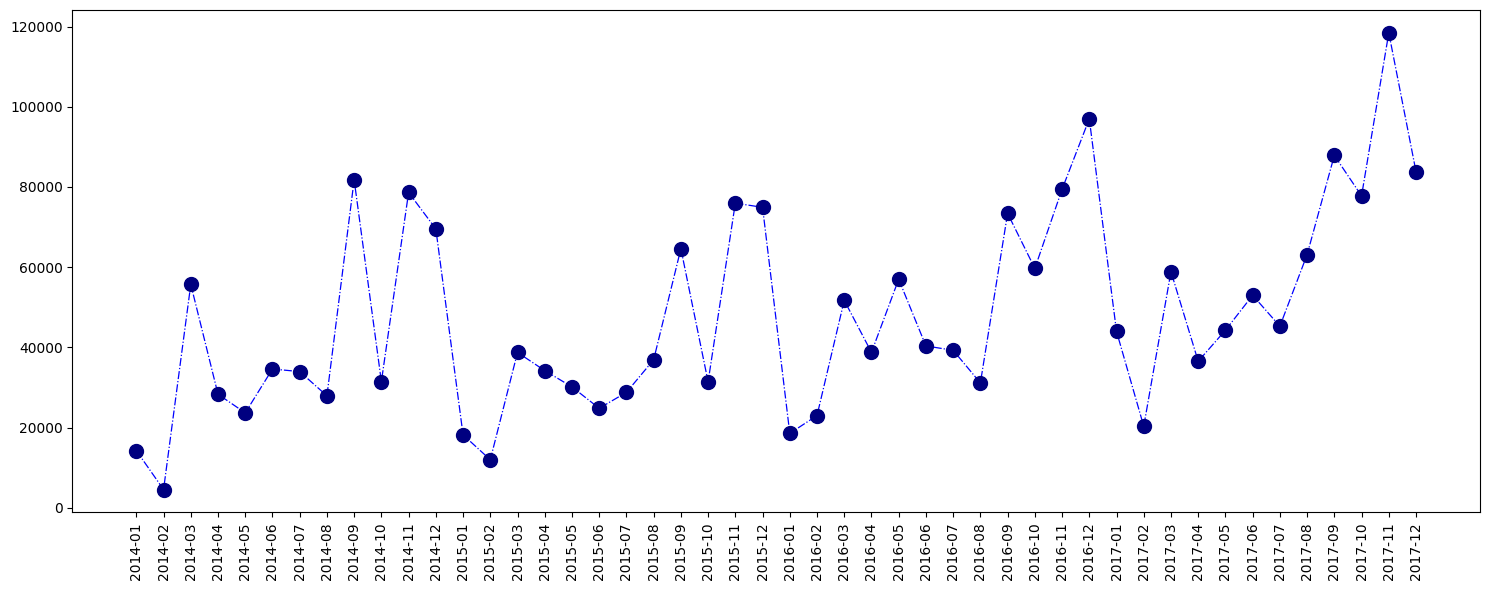

In [98]:

plt.figure(figsize=(15, 6))
plt.plot(sales_by_year_month['Year-Month'],sales_by_year_month['Sales'],**line_style)
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.show()

### **Profit By Year-Month**


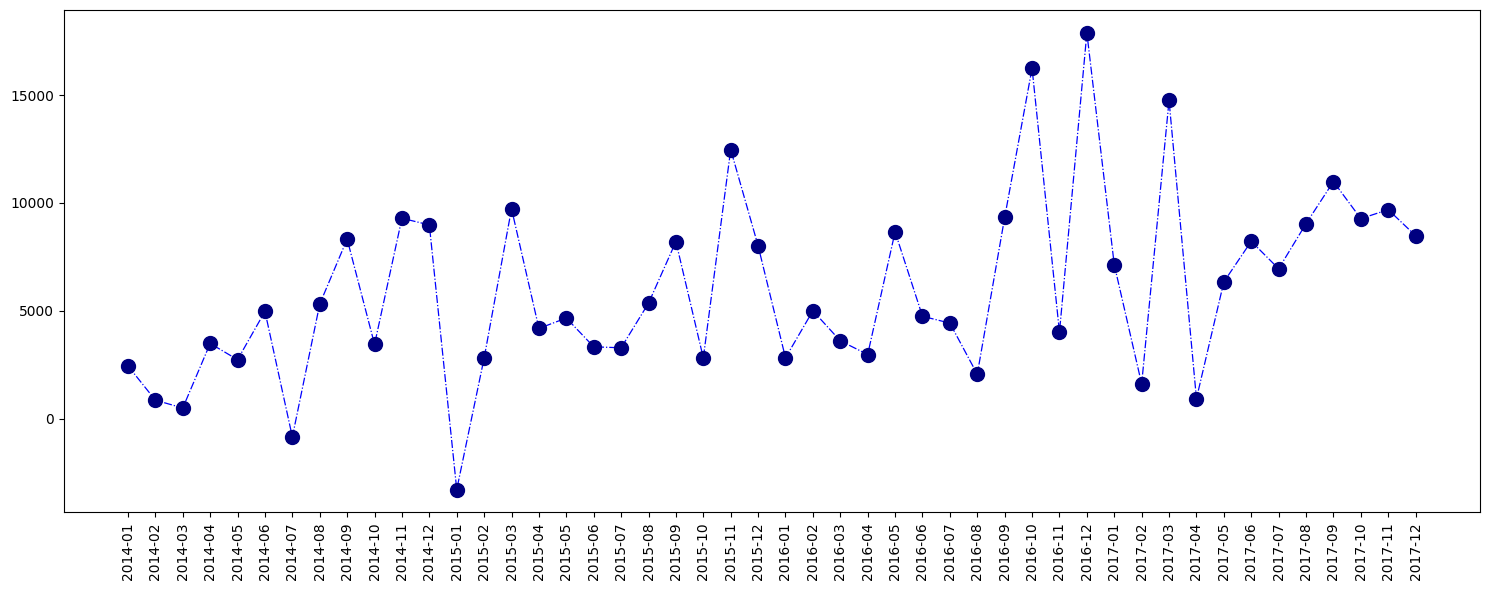

In [99]:

plt.figure(figsize=(15, 6))
plt.plot(profit_by_year_month['Year-Month'],profit_by_year_month['Profit'],**line_style)
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.show()

## **Customer Analysis**

### **Top-10 Customers by Sales**

In [115]:
df.groupby('Customer Name',as_index=False)['Sales'].sum().sort_values(by='Sales',ascending=False).reset_index(drop=True).head(10)

,Customer Name,Sales
0,Sean Miller,25043.050
1,Tamara Chand,19052.218
2,Raymond Buch,15117.339
3,Tom Ashbrook,14595.620
4,Adrian Barton,14473.571
5,Ken Lonsdale,14175.229
6,Sanjit Chand,14142.334
7,Hunter Lopez,12873.298
8,Sanjit Engle,12209.438
9,Christopher Conant,12129.072


### **Top-10 Customers by Profit**

In [114]:
df.groupby('Customer Name',as_index=False)['Profit'].sum().sort_values(by='Profit',ascending=False).reset_index(drop=True).head(10)

,Customer Name,Profit
0,Tamara Chand,8981.3239
1,Raymond Buch,6976.0959
2,Sanjit Chand,5757.4119
3,Hunter Lopez,5622.4292
4,Adrian Barton,5444.8055
5,Tom Ashbrook,4703.7883
6,Christopher Martinez,3899.8904
7,Keith Dawkins,3038.6254
8,Andy Reiter,2884.6208
9,Daniel Raglin,2869.0760


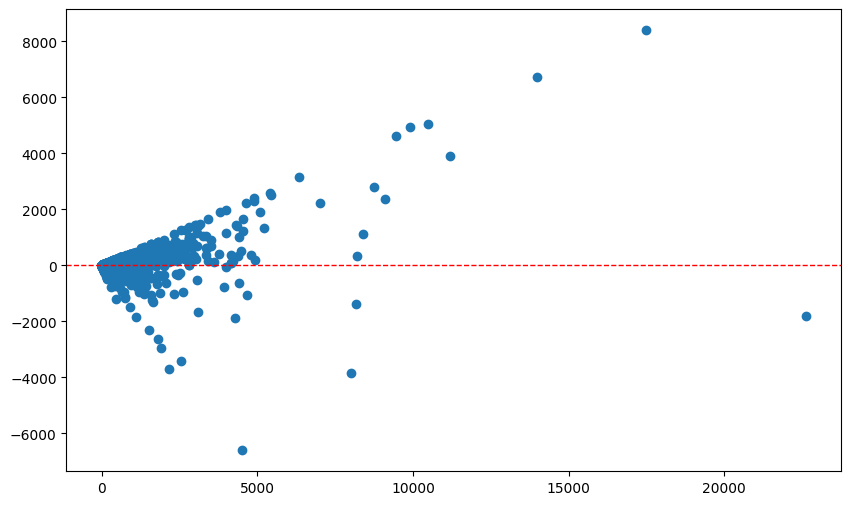

In [124]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Sales'],df['Profit'])
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)
plt.show()


<BarContainer object of 3 artists>

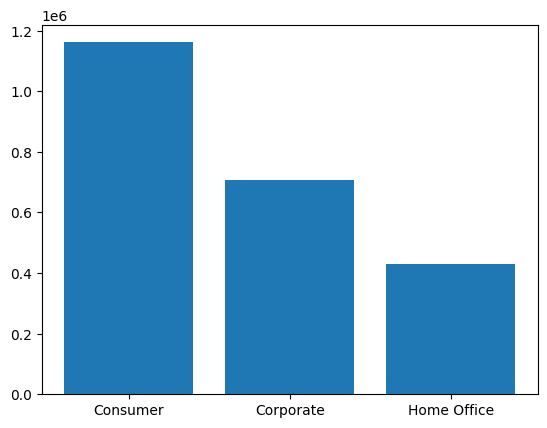

In [126]:
plt.bar(sales_by_segment['Segment'],sales_by_segment['Sales'])

<BarContainer object of 3 artists>

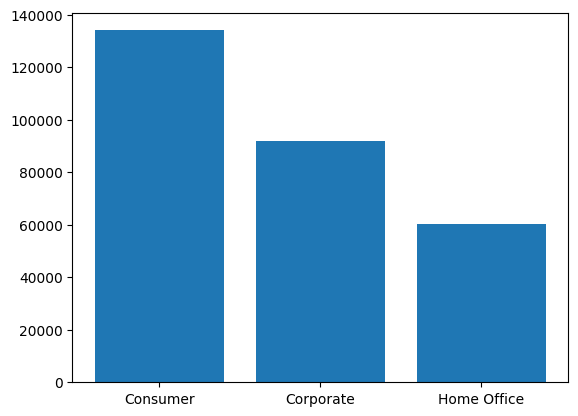

In [127]:
plt.bar(profit_by_segment['Segment'],profit_by_segment['Profit'])

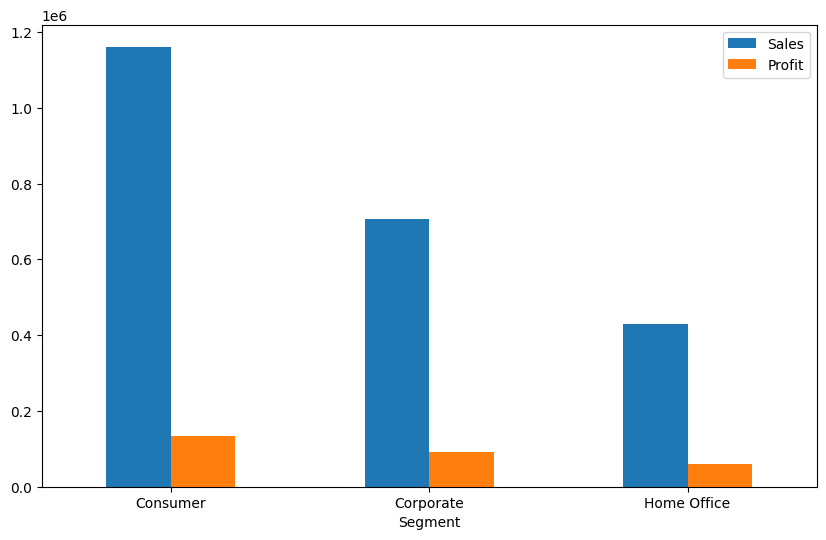

In [134]:
segment_data=df.groupby('Segment')[['Sales','Profit']].sum()
segment_data.plot(kind='bar',figsize=(10,6))
plt.xticks(rotation='horizontal')
plt.show()


In [140]:
df.groupby('Segment')['Profit'].sum().head(1)
df.groupby('Segment')['Profit'].sum().tail(1)


Segment
Home Office    60298.6785
Name: Profit, dtype: float64